In [61]:
#import pandas as pd and dataset used for this example
import pandas as pd

In [62]:
#we are using diabetes dataset (used earlier in module for logistic regression exercise)
diabetes = pd.read_csv('diabetes.csv')

In [63]:
#check to ensure no nulls in dataset (fill in/remove nas as needed)
#check to ensure all columns numeric (change data types, remove columns, create dummy variable columns as needed)

diabetes.info()
#no nas or nun-numeric columns here so we're good to go!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
#split dataframe into independent (X) and dependent variables (y). Dependent variable is outcome

X = diabetes.drop('Outcome', axis=1).copy()

y = diabetes.Outcome.copy()

In [65]:
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [66]:
y.head(3)

0    1
1    0
2    1
Name: Outcome, dtype: int64

In [67]:
#import sklearn train_test_split and create training and testing datasets by splitting up the data 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [68]:
len(X_train)

576

In [69]:
len(X_test)

192

In [70]:
#get Random Forest and train model

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
#check how well the model performed on dataset

model.score(X_test, y_test)

0.7708333333333334

In [72]:
#model predictions for y_test using the X_test

y_predicted = model.predict(X_test)

In [73]:
#cool way to view how accurate model was: confusion matrix heat map (NOT NECESSARY!!)
#find confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[115,  15],
       [ 29,  33]], dtype=int64)

Text(69.0, 0.5, 'Truth')

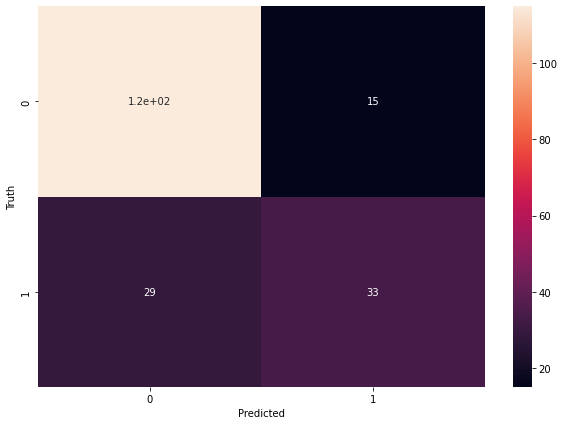

In [74]:
#graph OPTIONAL confusion matrix heat map

import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

How can we make this model more accurate? Check out hyperparameter n_estimators, increase number for better performance. Up to a certain point, accuracy will go up. Eventually, not much of a difference (not worth it)

In [75]:
#play around with n_estimators value to improve accuracy
#use cell below to see how much score improves by (too high a number means not much difference)

model = RandomForestClassifier(n_estimators=20)

In [76]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7864583333333334

Tada! You now are a Random Forest expert :)